## 12.4 Homework

- 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

To find p(x):

$$p(x) = \frac{w(x)}{\int_0^1 w(x)dx} = \frac{x^{-1/2}}{2x^{1/2}|_0^1} = \frac{1}{2\sqrt x}$$

To find F(x):

$$F(x) = \int_0^x p(x') dx = \int_0^x \frac{dx'}{2\sqrt x'} = \sqrt x$$

To find $F^{-1}(x)$:

$$F(F^{-1}(u)) = u$$ 

$$=>\sqrt(F^{-1}(u)) = u$$ square both sides,

$$=> F^{-1}(u) = u^2 => F^{-1}(x) = x^2$$

/Users/b_eebs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/b_eebs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


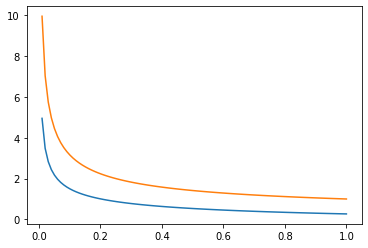

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from random import random
%matplotlib inline  

a = 0
b = 1.0
width = 100

f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
F_inv = lambda x: x**2 

x = np.linspace(a,b,width)

plt.plot(x,f(x))
plt.plot(x,w(x))
plt.show()

In [2]:
from scipy.integrate import quad

def IMC(N):
    const = quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = F_inv(x)
        I += f(y)/w(y)
    return I/N*const

print('IMC:', IMC(1000000))
print('Scipy: ', quad(f, 0, 1)[0])

IMC: 0.8388452775217291
Scipy:  0.8389329600133838


- 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

To find p(x), we need $\int_0^1 w(x)dx$, which is an improper integral in this limit:

$$\int_0^1 w(x)dx = \lim_{C \to 0}\int_C^1 \frac{dx}{x}$$

This integral was approximated with scipy library, i = 34.64413691056851, with C = 9e-16 

Thus, 

$$p(x) = \frac{w(x)}{\int_0^1 w(x)dx} = \frac{x^{-1}}{i} = \frac{x^{-1}}{34.64413691056851}$$

To find F(x):

$$F(x) = \int_0^x p(x') dx = \frac{1}{i}\int_0^x \frac{dx}{x}$$. 

Again, this is an improper integral, so I'll try to numerically choose values that force the integral approx. equal to the scipy solution. Thus, limits of integration for from [0,x] to [C,x]:

$$F(x) = \int_C^x p(x') dx = \frac{1}{i}\int_C^x \frac{dx'}{x'} = \frac{1}{i} ln[\frac{x}{C}]$$. 

To find $F^{-1}(x)$:

$$F(F^{-1}(u)) = u$$ 

$$=>\frac{1}{i} ln[\frac{F^{-1}(u)}{C}] = u$$ exponentiate both sides,

$$=> F^{-1}(u) = Ce^{iu} => F^{-1}(x) = Ce^{ix} $$

/Users/b_eebs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/b_eebs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


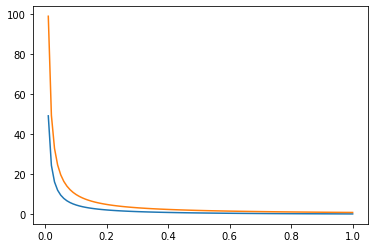

In [3]:
C = 9e-16 # lower integration limit
i = integrate.quad(w, C, 1)[0] # integral of w(x)

f = lambda x: 1/x/(np.exp(x)+1)
w = lambda x: 1/x
F_inv = lambda x: C*np.exp(x*i) 

plt.plot(x,f(x))
plt.plot(x,w(x))
plt.show()

In [4]:
def IMC(N):
    const = integrate.quad(w, 9e-16, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = F_inv(x)
        I += f(y)/w(y)
    return I/N*const

print('IMC:', IMC(1000000))
print('scipy:', quad(f, C, 1)[0])

IMC: 17.322068455284253
scipy: 17.078624157494264


# I'm sure that playing around with the value of C would bring these two values closer.